In [1]:
import numpy as np

# 주어진 행렬
A = np.array([[10, 5], [5, 9]])

# 고유값 문제를 풀기 위한 특성 방정식 구현
def characteristic_eqn(A, eigenvalue):
    I = np.eye(A.shape[0])  # 단위 행렬
    return np.linalg.det(A - eigenvalue * I)  # det(A - λI)

# 특성 방정식을 푸는 함수
def solve_characteristic_eqn(A):
    eigenvalues = np.roots([1, -np.trace(A), np.linalg.det(A)])  # 다항식의 근 찾기
    return eigenvalues

# 고유값 문제를 풀어서 고유값을 찾음
eigenvalues = solve_characteristic_eqn(A)
print("고유값:", eigenvalues)

# 고유값에 대응하는 고유벡터를 찾는 함수
def find_eigenvectors(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvectors

# 고유값에 대응하는 고유벡터를 찾음
eigenvectors = find_eigenvectors(A)
print("고유벡터:")
for i, vec in enumerate(eigenvectors.T):
    print(f"λ = {eigenvalues[i]} 에 대한 고유벡터:", vec)


고유값: [14.52493781  4.47506219]
고유벡터:
λ = 14.524937810560441 에 대한 고유벡터: [0.74145253 0.67100532]
λ = 4.475062189439559 에 대한 고유벡터: [-0.67100532  0.74145253]


In [10]:
import numpy as np

# 고유값 문제를 풀어서 고유값과 고유벡터를 찾는 함수
def find_eigen(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvalues, eigenvectors

# 예시로 주어진 행렬
A = np.array([[10, 5, 0],
              [5, 9, -2],
              [0, -2, 6]])

# 고유값과 고유벡터를 찾음
eigenvalues, eigenvectors = find_eigen(A)

print("고유값:", eigenvalues)
print("고유벡터:")
for i in range(len(eigenvalues)):
    print(f"λ = {eigenvalues[i]} 에 대한 고유벡터:", eigenvectors[:, i])


고유값: [14.73627305  3.52403711  6.73968984]
고유벡터:
λ = 14.7362730458557 에 대한 고유벡터: [-0.71716055 -0.67933364  0.15552024]
λ = 3.5240371146541385 에 대한 고유벡터: [ 0.51488378 -0.66687365 -0.53867823]
λ = 6.739689839490159 에 대한 고유벡터: [ 0.46965459 -0.30624393  0.82803335]


In [11]:
import numpy as np

# 행렬 A의 고유값을 구하는 함수
def find_eigenvalues(A):
    # A의 크기
    n = A.shape[0]
    
    # 특성 다항식의 계수를 저장할 배열 초기화
    coeffs = [1, -np.trace(A)]
    for k in range(2, n + 1):
        coeff_k = np.sum(np.linalg.eigvals(A) ** k)
        coeffs.append(-coeff_k / k)
    
    # 특성 다항식의 근을 구함
    eigenvalues = np.roots(coeffs)
    return eigenvalues

# 주어진 행렬 A와 고유값 lambda에 대해 (A - lambda*I)x = 0을 만족하는 고유벡터 x를 찾는 함수
def find_eigenvector(A, eigenvalue):
    # (A - lambda*I)x = 0에서 x를 구하기 위해 (A - lambda*I)를 계산
    shifted_matrix = A - eigenvalue * np.eye(A.shape[0])
    # 가우스 소거법을 사용하여 선형 연립방정식을 풂
    eigenvector = np.zeros(A.shape[0])
    eigenvector[-1] = 1  # 마지막 원소를 1로 설정하여 자유변수 설정
    for i in range(A.shape[0] - 2, -1, -1):
        eigenvector[i] = (shifted_matrix[i, -1] - np.dot(shifted_matrix[i, i + 1:], eigenvector[i + 1:])) / shifted_matrix[i, i]
    return eigenvector / np.linalg.norm(eigenvector)  # 벡터의 크기를 1로 정규화하여 고유벡터 반환

# 주어진 행렬 A의 고유값과 고유벡터를 찾는 함수
def find_eigen(A):
    eigenvalues = find_eigenvalues(A)
    eigenvectors = []
    for eigenvalue in eigenvalues:
        eigenvector = find_eigenvector(A, eigenvalue)
        eigenvectors.append(eigenvector)
    return eigenvalues, np.array(eigenvectors).T

# 예시로 주어진 행렬
A = np.array([[10, 5, 0],
              [5, 9, -2],
              [0, -2, 6]])

# 고유값과 고유벡터를 찾음
eigenvalues, eigenvectors = find_eigen(A)

print("고유값:", eigenvalues)
print("고유벡터:")
for i, vec in enumerate(eigenvectors.T):
    print(f"λ = {eigenvalues[i]} 에 대한 고유벡터:", vec)


고유값: [30.72799874+0.j         -2.86399937+5.50521987j -2.86399937-5.50521987j]
고유벡터:
λ = (30.727998744298645+0j) 에 대한 고유벡터: [-0. -0.  1.]
λ = (-2.8639993721493218+5.50521987013064j) 에 대한 고유벡터: [0. 0. 1.]
λ = (-2.8639993721493218-5.50521987013064j) 에 대한 고유벡터: [0. 0. 1.]


C:\Users\brigh\AppData\Local\Temp\ipykernel_12176\1882843826.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvector[i] = (shifted_matrix[i, -1] - np.dot(shifted_matrix[i, i + 1:], eigenvector[i + 1:])) / shifted_matrix[i, i]


In [12]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    """
    베이즈 정리를 사용하여 사후 확률을 계산하는 함수

    :param prior_A: 사전 확률 P(A)
    :param prob_B_given_A: 사건 A가 주어졌을 때의 사건 B의 조건부 확률 P(B|A)
    :param prob_B: 사건 B의 확률 P(B)
    :return: 사후 확률 P(A|B)
    """
    return (prob_B_given_A * prior_A) / prob_B

# 예시: 쿠키 문제
# 사건 A: 바구니 1에서 쿠키를 뽑았을 때 초콜릿 쿠키를 뽑을 확률
# 사건 B: 초콜릿 쿠키를 뽑았을 때 바구니 1에서 뽑았을 확률

# 사전 확률 P(A): 초콜릿 쿠키가 있는 바구니 1의 비율
prior_A = 0.5

# 사건 A가 주어졌을 때의 사건 B의 조건부 확률 P(B|A): 바구니 1에서 초콜릿 쿠키를 뽑을 확률
prob_B_given_A = 0.75

# 사건 B의 확률 P(B): 초콜릿 쿠키를 뽑을 확률
prob_B = (prior_A * prob_B_given_A) + ((1 - prior_A) * (1 - prob_B_given_A))

# 사후 확률 P(A|B): 초콜릿 쿠키를 뽑았을 때 그것이 바구니 1에서 뽑았을 확률
posterior_A = bayes_theorem(prior_A, prob_B_given_A, prob_B)
print("사후 확률 P(A|B):", posterior_A)


사후 확률 P(A|B): 0.75


In [13]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    """
    베이즈 정리를 사용하여 사후 확률을 계산하는 함수

    :param prior_A: 사전 확률 P(A)
    :param prob_B_given_A: 사건 A가 주어졌을 때의 사건 B의 조건부 확률 P(B|A)
    :param prob_B: 사건 B의 확률 P(B)
    :return: 사후 확률 P(A|B)
    """
    return (prob_B_given_A * prior_A) / prob_B

# 바구니 1에 있는 쿠키의 개수
num_cookies_basket1 = 30
# 바구니 1에 있는 초콜릿 쿠키의 개수
num_chocolate_cookies_basket1 = 10

# 바구니 2에 있는 쿠키의 개수
num_cookies_basket2 = 20
# 바구니 2에 있는 초콜릿 쿠키의 개수
num_chocolate_cookies_basket2 = 5

# 사전 확률 P(A): 초콜릿 쿠키가 있는 바구니 1의 비율
prior_A = num_cookies_basket1 / (num_cookies_basket1 + num_cookies_basket2)

# 사건 A가 주어졌을 때의 사건 B의 조건부 확률 P(B|A): 바구니 1에서 초콜릿 쿠키를 뽑을 확률
prob_B_given_A = num_chocolate_cookies_basket1 / num_cookies_basket1

# 사건 B의 확률 P(B): 초콜릿 쿠키를 뽑을 확률
prob_B = (prior_A * prob_B_given_A) + ((1 - prior_A) * (num_chocolate_cookies_basket2 / num_cookies_basket2))

# 사후 확률 P(A|B): 초콜릿 쿠키를 뽑았을 때 그것이 바구니 1에서 뽑았을 확률
posterior_A = bayes_theorem(prior_A, prob_B_given_A, prob_B)
print("사후 확률 P(A|B):", posterior_A)


사후 확률 P(A|B): 0.6666666666666666


기울기 (가중치): [[2.96846751]]
절편: [4.22215108]


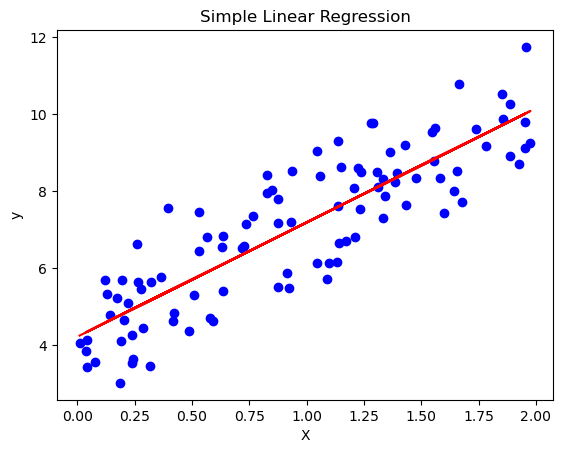

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 선형 회귀 모델 정의 및 훈련
model = LinearRegression()
model.fit(X, y)

# 훈련된 모델의 기울기와 절편 출력
print("기울기 (가중치):", model.coef_)
print("절편:", model.intercept_)

# 데이터와 훈련된 선형 회귀 모델의 그래프 그리기
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()
